# Gradients

Synopsis: Looking at directional change of intensity with Sobel-Feldman operators, often called Sobel.

### The what.
Gradients of an image can be calculated in both x and y axes. Just a singular axes normalization with a Sobel-Feldman operator will lose detail but still have edge detection capabilities. You will typically see the vertical distinctions but nothing of the horizontal distinctions. If you normalize along the y gradient then it will show the horizontal distinctions.  


### The How
The operator uses two `3 x 3` kernels which are convolved with the original image to calculate approximations of the derivatives (rate of change). One kernel for each axes which aloows for edge detection. Gradients of an image can be calculated in both x and y axes. Just a singular axes normalization with a Sobel-Feldman operator will lose detail but still have edge detection capabilities. You will typically see the vertical distinctions but nothing of the horizontal distinctions. If you normalize along the y gradient then it will show the horizontal distinctions.  

The operator uses two `3 x 3` kernels which are convolved with the original image to calculate approximations of the derivatives (rate of change). One kernel for each axes which aloows for edge detection. 

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### convenience functions

In [2]:
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

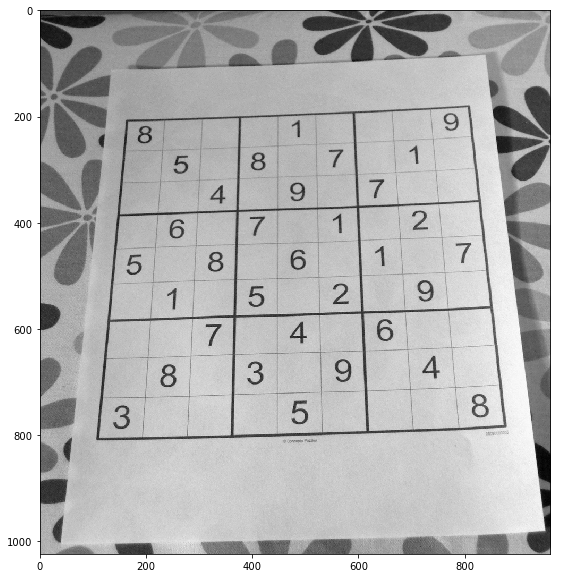

In [3]:
img = cv2.imread('DATA/sudoku.jpg', 0)
display_img(img)

### Use the Sobel operators 

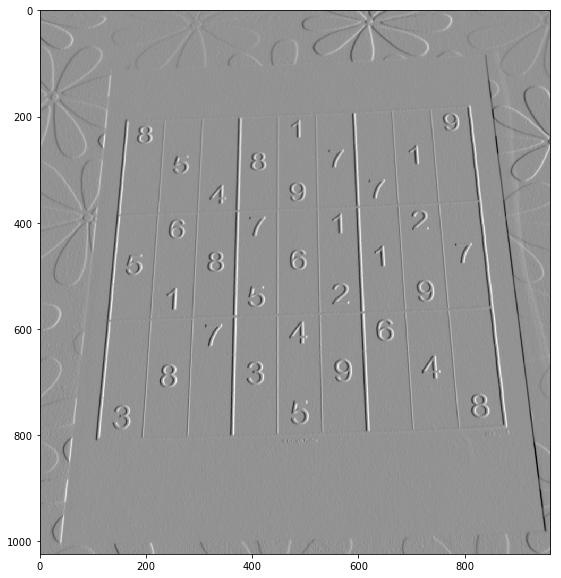

In [4]:
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
display_img(sobelx)

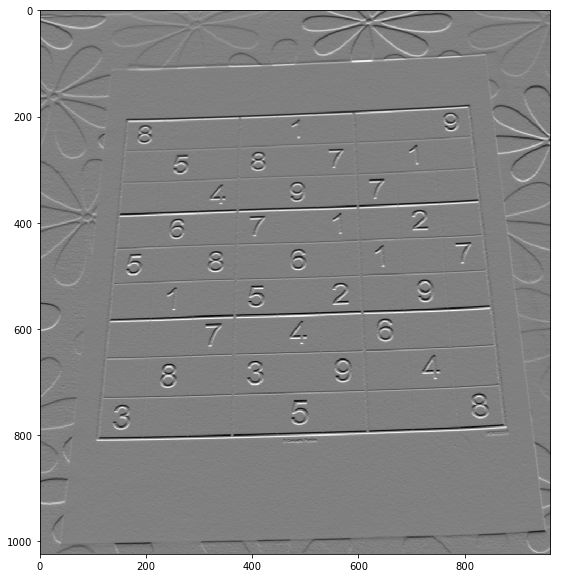

In [5]:
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)
display_img(sobely)


# The Laplacian Gradient

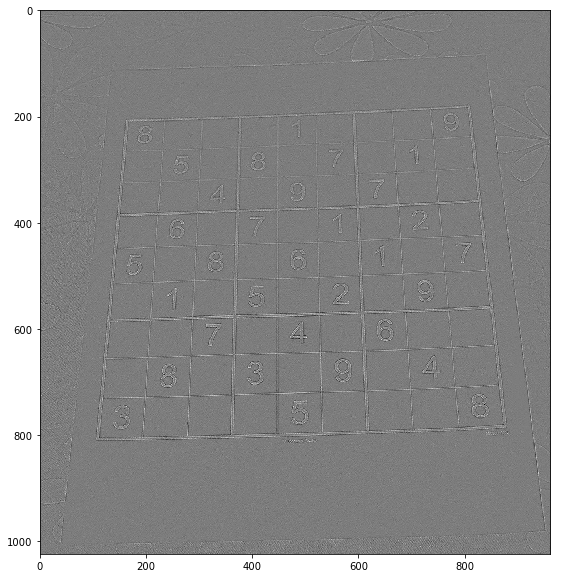

In [6]:
laplacian = cv2.Laplacian(img, cv2.CV_64F)
display_img(laplacian)

# Blending the calculated Sobels 

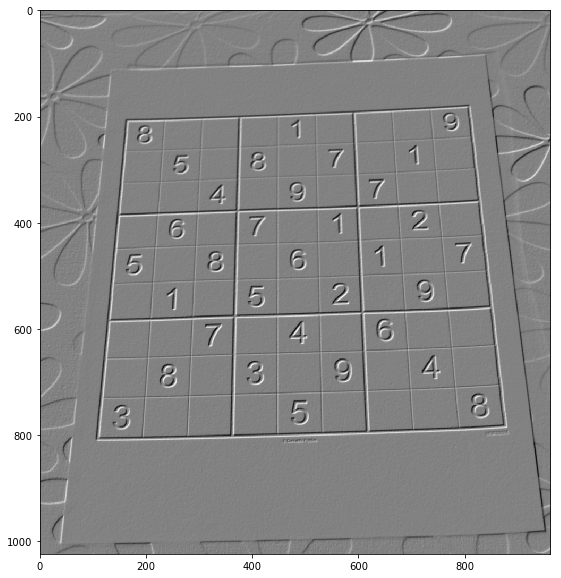

In [7]:
blended = cv2.addWeighted(src1=sobelx, alpha=0.5, src2=sobely, beta=0.5, gamma=0)
display_img(blended)

### Thresholding 

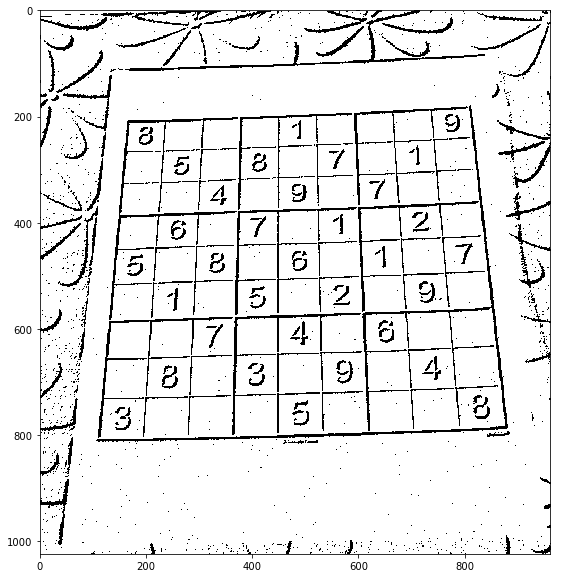

In [16]:
ret, th1 = cv2.threshold(blended, 220, 255, cv2.THRESH_BINARY_INV)
display_img(th1)

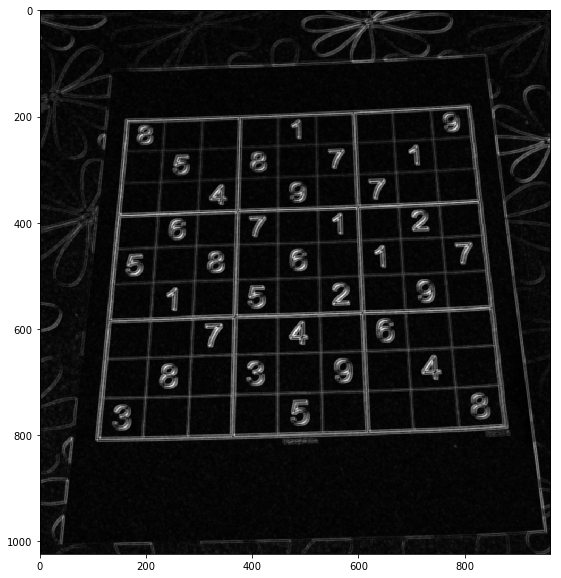

In [17]:
kernel = np.ones((4,4), np.uint8)
gradient = cv2.morphologyEx(blended, cv2.MORPH_GRADIENT, kernel)
display_img(gradient)